In [1]:
#Task 1: Data Preparation
#Task 1.1: Data Retrieving
import pandas as pd

data = pd.read_csv('StarWars.csv',encoding='unicode escape',header=None)
data = data.drop([0,1])

# Index starts from 0

# ID index 0
# Wached Star Wars index 1
# Fan of Star Wars index 2
# Watched episode index 3-8
# Ranking index 9-14
# Character rating index 15-28
# "Who shot first" index 29
# The Expanded Universe index 30
# Fan of the Expanded Universe index 31
# Fan of Star Trek index 32
# Gender index 33
# Age index 34
# Education index 35
# Location index 36

# Give header names to the columns
data.columns = ['Respondent ID',
                'Watched the Star Wars franchise?',
                'Fan of the franchise?',
                'Seen Ep I',
                'Seen Ep II',
                'Seen Ep III',
                'Seen Ep IV',
                'Seen Ep V',
                'Seen Ep VI',
                'Rank The Film From 1-6 for EP I',
                'Rank The Film From 1-6 for EP II',
                'Rank The Film From 1-6 for EP III',
                'Rank The Film From 1-6 for EP IV',
                'Rank The Film From 1-6 for EP V',
                'Rank The Film From 1-6 for EP VI',
                'How do you like the character: Han Solo',
                'How do you like the character: Luke Skywalker',
                'How do you like the character: Princess Leia Organa',
                'How do you like the character: Anakin Skywalker',
                'How do you like the character: Obi Wan Kenobi',
                'How do you like the character: Emperor Palpatine',
                'How do you like the character: Darth Vader',
                'How do you like the character: Lando Calrissian',
                'How do you like the character: Boba Fett',
                'How do you like the character: C-3P0',
                'How do you like the character: R2 D2',
                'How do you like the character: Jar Jar Binks',
                'How do you like the character: Padme Amidala',
                'How do you like the character: Yoda',
                'Which character shot first?',
                'Familiar with the Expanded Universe?',
                'Fan of the Expanded Universe?',
                'Fan of the Star Trek franchise?',
                'Gender',
                'Age',
                'Household Income',
                'Education',
                'Location (Census Region)']

#Task 1.4: Extra-whitespaces (For initial data cleansing - overall str.strip() is also done towards the end)
data['Watched the Star Wars franchise?'] = data['Watched the Star Wars franchise?'].str.strip()
data['Watched the Star Wars franchise?'].fillna('Did not answer', inplace=True)
data['Fan of the franchise?'] = data['Fan of the franchise?'].str.strip()

#Task 1.7: Missing values (This step is done for everywhere that uses .fillna function)
data['Fan of the franchise?'].fillna('Did not answer', inplace=True)

watchedColumns = ["Seen Ep I",
                  "Seen Ep II",
                  "Seen Ep III",
                  "Seen Ep IV",
                  "Seen Ep V",
                  "Seen Ep VI"]

episodes = ['Star Wars: Episode I  The Phantom Menace',
            'Star Wars: Episode II  Attack of the Clones',
            'Star Wars: Episode III  Revenge of the Sith',
            'Star Wars: Episode IV  A New Hope',
            'Star Wars: Episode V The Empire Strikes Back',
            'Star Wars: Episode VI Return of the Jedi']

filmRating = ['Rank The Film From 1-6 for EP I',
              'Rank The Film From 1-6 for EP II',
              'Rank The Film From 1-6 for EP III',
              'Rank The Film From 1-6 for EP IV',
              'Rank The Film From 1-6 for EP V',
              'Rank The Film From 1-6 for EP VI']

observation_index = 2
max_observation_index = len(data.index)

# Replace the text value to a readible and sensible data collection
for col in watchedColumns:
    for value in episodes:
        data[col].replace(value,'Watched',inplace=True)
        data[col].fillna('Not Watched', inplace=True)

# Task 1.7: Filling missing values
for value in filmRating:
    data[value].fillna('0', inplace=True)

# Task 1.6: Sanity checks
# If they haven't seen the Star Wars franchise, they cannot possibly be a fan
while (observation_index <= max_observation_index):
    if(data.loc[observation_index, 'Watched the Star Wars franchise?'] == 'No' or data.loc[observation_index, 'Watched the Star Wars franchise?'] == 'Did not answer'):
        if(data.loc[observation_index, 'Fan of the franchise?'] == 'Yes'):
            data.loc[observation_index, 'Fan of the franchise?'] = "No"
    observation_index += 1
observation_index = 2

# Generate all character rating questions
character_rating = []
character_index = 15
while True:
  character_rating.append(data.columns[character_index])
  character_index += 1
  if (character_index == 29):
    break

# Task 1.7: Missing values as well as replace the text value to a readible and sensible data collection
for col in character_rating:
    data[col].replace('Neither favorably nor unfavorably (neutral)','Neutral',inplace=True)
    data[col].replace('Unfamiliar (N/A)','Unfamiliar',inplace=True)
    data[col].fillna('Did not answer', inplace=True)

# Task 1.7: Missing values
data['Which character shot first?'].fillna("Did not answer",inplace=True)
# Now these columns has "No" and "Did not answer" and "Yes"
data['Familiar with the Expanded Universe?'].fillna("Did not answer",inplace=True)
data['Fan of the Expanded Universe?'].fillna("Did not answer",inplace=True)

# Task 1.6: Sanity checks
# If they are a fan of the Expanded Universe, they must be familiar with it
while (observation_index <= max_observation_index):
    if(data.loc[observation_index, 'Fan of the Expanded Universe?'] == 'Yes'):
        if(data.loc[observation_index, 'Familiar with the Expanded Universe?'] == 'No' or data.loc[observation_index, 'Familiar with the Expanded Universe?'] == 'Did not answer'):
            data.loc[observation_index, 'Familiar with the Expanded Universe?'] = "Yes"
    observation_index += 1
observation_index = 2

# Task 1.7: Missing values
data['Fan of the Star Trek franchise?'].fillna("Did not answer",inplace=True)
data['Gender'].fillna("Did not answer",inplace=True)

#Task 1.3: Typos (Checking typos for gender) this step is also being repeated everywhere that uses .loc and .replace functions
# First use data['Gender'].value_counts() to see what sort of variations we have
# Then change female => Female, male => Male, F => Male
while (observation_index <= max_observation_index):
    if(data.loc[observation_index, 'Gender'] != 'Male' or data.loc[observation_index, 'Gender'] != 'Female'):
        if(data.loc[observation_index, 'Gender'] == 'female' or data.loc[observation_index, 'Gender'] == 'F'):
            data.loc[observation_index, 'Gender'] = "Female"
        if(data.loc[observation_index, 'Gender'] == 'male' or data.loc[observation_index, 'Gender'] == 'M'):
            data.loc[observation_index, 'Gender'] = "Male"
    observation_index += 1
observation_index = 2

# Task 1.7: Missing values
data['Age'].fillna("Did not answer",inplace=True)
data['Household Income'].fillna("Did not answer",inplace=True)
data['Education'].fillna("Did not answer",inplace=True)
data['Location (Census Region)'].fillna("Did not answer",inplace=True)

#Task 1.6: Sanity checks, checking if answer is reasonable within the age rage seen from .value_counts()
age_response = ['18-29','30-44','45-60','> 60']
while (observation_index <= max_observation_index):
    if(data.loc[observation_index, 'Age'] not in age_response):
        data.loc[observation_index, 'Age'] = "Did not answer" 
    observation_index += 1
observation_index = 2

#Task 1.6: Sanity checks, if they have selected a film, they MUST have watched the Star Wars franchise
watched_star_wars = False
while(observation_index <= max_observation_index):
    for col in watchedColumns:
        if(data.loc[observation_index, col] == 'Watched'):
            watched_star_wars = True
    if(watched_star_wars is True):
        data.loc[observation_index, 'Watched the Star Wars franchise?'] = 'Yes'
    else:
        data.loc[observation_index, 'Watched the Star Wars franchise?'] = 'No'
    observation_index += 1
    watched_star_wars = False
observation_index = 2

#Task 1.5: Upper/Lower-case & Task 1.4: Extra-whitespaces
for header in data.columns:
    data[header] = data[header].str.upper()
    data[header].str.strip()

#Task 1.2: Check data types (Ensuring that the appropriate types are being used for future data preparation)
for val in filmRating:
    data[val] = data[val].astype(int)
data['Respondent ID'] = data['Respondent ID'].astype(float)

# Generate all character rating questions
did_not_answer_questions =[]
question_index = 33
while True:
  did_not_answer_questions.append(data.columns[question_index])
  question_index += 1
  if (question_index == 37):
    break

#Task 1.7: Missing values (Handling observations that did not answer any question at all - omit them)
no_answer = 0
while(observation_index <= max_observation_index):
    if(data.loc[observation_index,'Watched the Star Wars franchise?'] == 'NO' or data.loc[observation_index,'Watched the Star Wars franchise?'] == 'DID NOT ANSWER'):
        for val in did_not_answer_questions:
            if(data.loc[observation_index,val] == 'DID NOT ANSWER'):
                no_answer += 1
        if(no_answer == 4):
            data = data.drop(observation_index)
    no_answer = 0
    observation_index += 1
observation_index = 2

In [68]:
# Task 2: Data Exploration
import matplotlib.pyplot as plt

ep = ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI']
for i in range(len(episodes)):
    episodes[i] = ep[i]

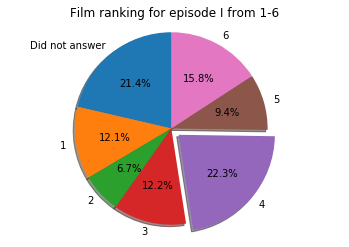

In [73]:
# Task 2.1: Explore a survey question
# Pie chart ordered in anti-clockwise representing how episode 1 is rated
labels = ['Did not answer','1','2','3','4','5','6']
sizes = data['Rank The Film From 1-6 for EP I'].value_counts().sort_index().tolist()

explode = (0, 0, 0, 0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Film ranking for episode I from 1-6")
plt.show()

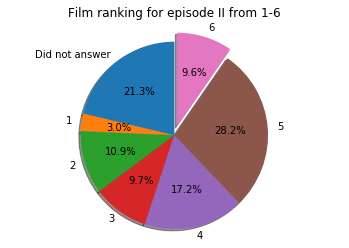

In [78]:
# Pie chart ordered in anti-clockwise representing how episode 1 is rated
labels = ['Did not answer','1','2','3','4','5','6']
sizes = data['Rank The Film From 1-6 for EP II'].value_counts().sort_index().tolist()

explode = (0, 0, 0, 0, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Film ranking for episode II from 1-6")
plt.show()